<h1 style="text-align:center">Gestion des bugs et bases de données</h1>

Nous avons vu dans un TP précédent comment gérer la récupération d'erreurs par un programme, avec la mise en place de structures de **levée d'exceptions**.

Appliquons cela à la mise en place d'un programme récupérant des données dans une base de données.


## Structure générale

La structure classique d'échange entre Python et un SGBDR - en l'occurrence SQLite - est la suivante :


In [ ]:
# Import de la bibliothèque de gestion de SQLite
import sqlite3

# Création d'une connexion à la base de données (c'est un objet sqlite3)
connexion = sqlite3.connect('baseVilles.db')

# Création d'un curseur
curseur = connexion.cursor()

# Création d'une requête :
requeteSQL = "SELECT nom_ville, cp_ville FROM Ville WHERE cp_ville LIKE '35%' ORDER BY nom_ville DESC LIMIT 20"

# Exécution de la requête
curseur.execute(requeteSQL)

# Récupération des lignes sous forme de liste
lignes = curseur.fetchall()

# Fermeture du curseur
curseur.close()

# Actualisation de la base (en cas d'UPDATE ou d'INSERT)
connexion.commit()
  
# Fermeture de la connexion
connexion.close()


En cas de sélection dans la base, l'objet récupéré est une liste de tuples.

*Rappel* : un tuple est **non mutable** (on ne peut modifier son contenu).

In [ ]:
# Affichage de la liste des lignes récupérées :
print(lignes)

# Affichage du second tuple
print(lignes[1])

# Affichage du code postal de la ville concernée :
print(lignes[1][1])


# Mise en pratique 

**Exercice 1 :**

On rappelle que la structure de la base (déjà manipulée précédemment) est la suivante :

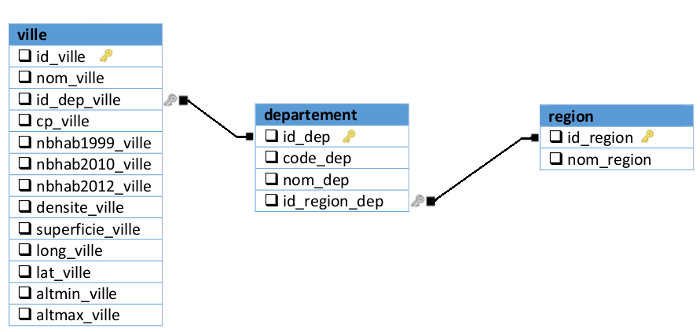

1. Faire une requête permettant de récupérer les villes de France ayant perdu 5000 habitants entre 1999 et 2012.

2. Présenter le résultat sous la forme d'une phrase : "Les villes françaises ayant perdu 5000 habitants entre 1999 et 2012 sont *VilleA*, *VilleB*, *VilleC*."

**Exercice 2 :** *Vérification de chaîne*

Écrire une fonction `saisieChaine(question, caracteresInterdits)` qui :
* demande la saisie d'une chaîne de caractères 
* se relance en cas de chaîne vide ou de présence de caractères interdits.


In [ ]:
def saisieChaine(question):
    pass

In [ ]:
saisieChaine("Saisissez une chaîne de caractères non-vide : ")

**Exercice 3 :**
Améliorer la fonction précédente en proposant aussi de limiter la saisie à certains caractères (avec la mise en place d'une RegEx)


In [ ]:
import re
def saisieChaineRegEx(question, caracteresAutorises = ""):
    pass

In [ ]:
print(saisieChaineRegEx("Saisir une chaîne de caractères \
avec uniquement des voyelles et des chiffres : ","aeiouAEIOU0-9"))

**Exercice 4 :**

Réaliser un mini éditeur de requêtes SQL. Celui-ci demandera trois données à l'utilisateur :
* sur quelle table effectuer la requête de sélection ;
* quels champs afficher ;
* quels filtres mettre en place pour la requête.

On mettra tout en œuvre afin que quelque soit la saisie de l’utilisateur, le programme ne s’arrête
pas, impose la saisie de caractères à chaque question (avec éventuellement des caractères interdits) et affiche correctement les éventuels messages par suite d’erreurs de syntaxe dans la requête SQL.

Le script affichera les données sous forme de tableau.

In [ ]:
def editeurRequetes():
    pass
        

In [ ]:
editeurRequetes()

## Insertion ou mise à jour

Reprenons la structure pour ajouter des départements dans la base de données.
Voici un exemple d'insertion simple

*Remarque* : nous laisserons la connexion ouverte afin d'alléger un peu l'ensemble de la structure.


In [ ]:
# Création d'une connexion à la base de données (c'est un objet sqlite3)
connexion = sqlite3.connect('baseVilles.db')

# Création d'un curseur
curseur = connexion.cursor()

# Création d'une requête :
requeteSQL = "INSERT INTO Departement(code_dep, nom_dep) VALUES (0,'Non connu')"

# Exécution de la requête
curseur.execute(requeteSQL)

# Fermeture du curseur
curseur.close()

# Actualisation de la base
connexion.commit()


Vous pouvez ouvrir DB Browser for SQLite et constater que la liste des départements s'est allongée.



#### Inclusion par tableau de données

Néanmoins, cet usage avec inclusion directe des valeurs à insérer (ou mettre à jour) dans la chaîne de caractères de la requête est peu répandu. Le principe est usuellement de fournir directement un tableau de données (liste, dictionnaire) à Python afin que le module de gestion insère la ou les lignes correspondantes.

Ainsi, on écrira plutôt la chose suivante :



In [ ]:
# Création d'un curseur
curseur = connexion.cursor()

# Création d'une requête :
requeteSQL = "INSERT INTO Departement(code_dep, nom_dep) VALUES (?, ?)"

donnees = [
    [983, 'Nouvelle Calédonie'],
    [984, 'Polynésie'],
    [987, 'Wallis et Futuna']
]

# Exécution des requêtes
for departement in donnees:
    curseur.execute(requeteSQL, departement)

# Fermeture du curseur
curseur.close()

# Actualisation de la base
connexion.commit()


Voire en passant par un dictionnaire :
    

In [ ]:
# Création d'un curseur
curseur = connexion.cursor()

# Création d'une requête :
requeteSQL = "INSERT INTO Departement(code_dep, nom_dep) VALUES (:numero, :nom)"

donnees = [
    {'numero' : 977, 'nom' : 'Saint-Barthélemy'},
    {'numero' : 975, 'nom' : 'Saint-Pierre-et-Miquelon'},
    {'numero' : 991, 'nom' : 'Kerguelen'}
]

# Exécution des requêtes
for departement in donnees:
    curseur.execute(requeteSQL, departement)

# Fermeture du curseur
curseur.close()

# Actualisation de la base
connexion.commit()


**Exercice 5 :** *Pour aller plus loin : les requêtes d'insertion*

Réaliser un mini éditeur de requêtes SQL. Celui-ci demandera à l'utilisateur :

* s'il s'agit d'une insertion (INSERT) ou d'une mise à jour (UPDATE) des données ;
* sur quelle table effectuer la requête de sélection ;
* quels champs sont concernés ;
* quels filtres mettre en place en cas de requête de mise à jour

On mettra tout en œuvre afin que quelque soit la saisie de l’utilisateur, le programme ne s’arrête pas, impose la saisie de caractères à chaque question (avec éventuellement des caractères interdits) et affiche correctement les éventuels messages par suite d’erreurs de syntaxe dans la requête SQL.

Le script affichera un message de confirmation si l'insertion ou la mise à jour ont bien été réalisées.

In [ ]:
editeurRequetes2():
    pass